### Load the Dataset

In [1]:
import numpy as np 
import pandas as pd

train_df=pd.read_csv('IMDB Dataset.csv')
train_df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


The "review" column contains the textual information(input features) and the "sentiment" column contains the output labels. The task of any classifier is to correctly predict the "sentiment" given any "review" or textual column. Hence we have to apply our data cleaning, transformation steps to the "review" column

In [2]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn import preprocessing,metrics,manifold
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,cross_val_predict
from imblearn.over_sampling import ADASYN,SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
import collections
import matplotlib.patches as mpatches
from sklearn.metrics import accuracy_score
%matplotlib inline
from sklearn.preprocessing import RobustScaler
import xgboost
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import classification_report,roc_auc_score,roc_curve,r2_score,recall_score,confusion_matrix,precision_recall_curve
from collections import Counter
from sklearn.model_selection import StratifiedKFold,KFold,StratifiedShuffleSplit
from nltk import word_tokenize
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD,SparsePCA
from sklearn.metrics import classification_report,confusion_matrix
from nltk.tokenize import word_tokenize
from collections import defaultdict
from collections import Counter
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
import nltk
from nltk.corpus import stopwords
import string
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [3]:
## Assess the shape of the data
print("The Shape of the Dataset".format(),train_df.shape)

The Shape of the Dataset (50000, 2)


In [4]:
# Check unique values
train_df.nunique()

review       49582
sentiment        2
dtype: int64

## Statistical Analysis-1

At the beginning of the analysis phase, we will begin by examining the quantity of data available for each sentiment. Afterwards, we will create some visual representations that show the relationship between the words and their frequency.

In [5]:
good_reviews=train_df[train_df['sentiment']=='positive']['review']
bad_reviews=train_df[train_df['sentiment']=='negative']['review']
print("First 10 samples of good reviews\n".format(),good_reviews[:10])
print("First 10 samples of bad reviews\n".format(),bad_reviews[:10])

First 10 samples of good reviews
 0     One of the other reviewers has mentioned that ...
1     A wonderful little production. <br /><br />The...
2     I thought this was a wonderful way to spend ti...
4     Petter Mattei's "Love in the Time of Money" is...
5     Probably my all-time favorite movie, a story o...
6     I sure would like to see a resurrection of a u...
9     If you like original gut wrenching laughter yo...
14    This a fantastic movie of three prisoners who ...
16    Some films just simply should not be remade. T...
18    I remember this film,it was the first film i h...
Name: review, dtype: object
First 10 samples of bad reviews
 3     Basically there's a family where a little boy ...
7     This show was an amazing, fresh & innovative i...
8     Encouraged by the positive comments about this...
10    Phil the Alien is one of those quirky films wh...
11    I saw this movie when I was about 12 when it c...
12    So im not a big fan of Boll's work but then ag...
13    The

Total Counts of both sets positive    25000
negative    25000
Name: sentiment, dtype: int64


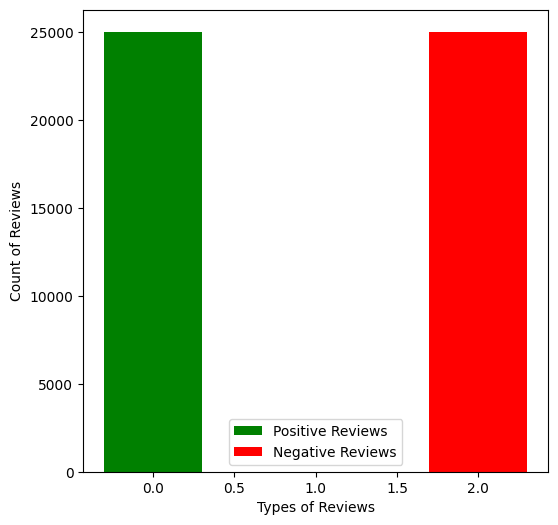

In [6]:
#Count of good and bad reviews
count=train_df['sentiment'].value_counts()
print('Total Counts of both sets'.format(),count)

print("==============")
#Creating a function to plot the counts using matplotlib
def plot_counts(count_good,count_bad):
    plt.rcParams['figure.figsize']=(6,6)
    plt.bar(0,count_good,width=0.6,label='Positive Reviews',color='Green')
    plt.legend()
    plt.bar(2,count_bad,width=0.6,label='Negative Reviews',color='Red')
    plt.legend()
    plt.ylabel('Count of Reviews')
    plt.xlabel('Types of Reviews')
    plt.show()
    
count_good=train_df[train_df['sentiment']=='positive']
count_bad=train_df[train_df['sentiment']=='negative']
plot_counts(len(count_good),len(count_bad))

Positive Review Words:0        307
1        162
2        166
4        230
5        119
        ... 
49983    133
49985    216
49989    173
49992    170
49995    194
Name: review, Length: 25000, dtype: int64
Negative Review Words:3        138
7        174
8        130
10        96
11       180
        ... 
49994    134
49996    112
49997    230
49998    212
49999    129
Name: review, Length: 25000, dtype: int64


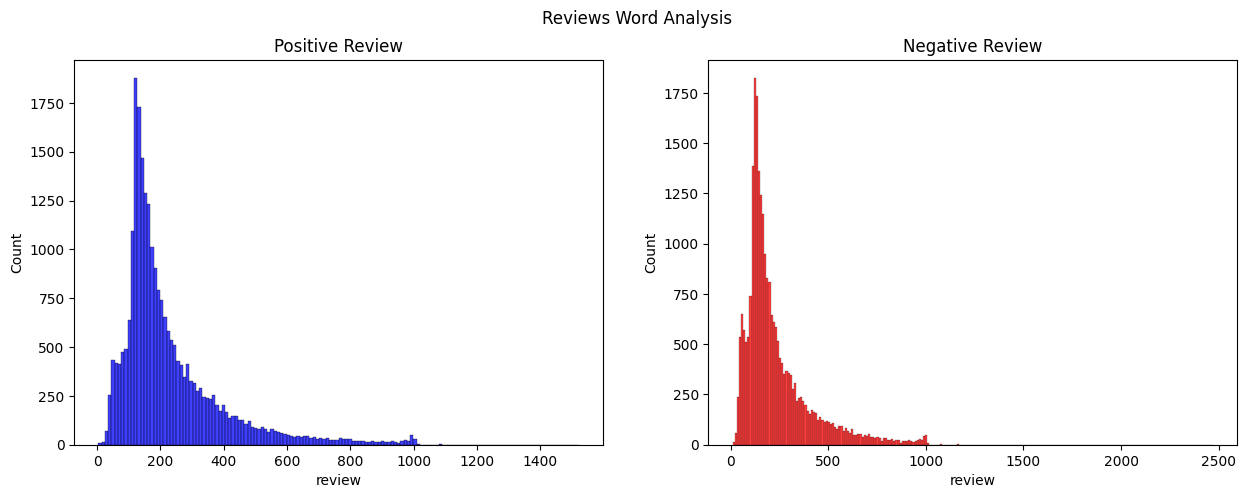

In [7]:
#Analyse the count of words in each segment- both positive and negative reviews
#Function for checking word length
def cal_len(data):
    return len(data)

#Create generic plotter with Seaborn
def plot_count(count_ones,count_zeros,title_1,title_2,subtitle):
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
    sns.histplot(count_zeros,ax=ax1,color='Blue')
    ax1.set_title(title_1)
    sns.histplot(count_ones,ax=ax2,color='Red')
    ax2.set_title(title_2)
    fig.suptitle(subtitle)
    plt.show()    


count_good_words=count_good['review'].str.split().apply(lambda z:cal_len(z))
count_bad_words=count_bad['review'].str.split().apply(lambda z:cal_len(z))
print("Positive Review Words:" + str(count_good_words))
print("Negative Review Words:" + str(count_bad_words))
plot_count(count_good_words,count_bad_words,"Positive Review","Negative Review","Reviews Word Analysis")

In [8]:
#Count Punctuations/Stopwords/Codes and other semantic datatypes
#We will be using the "generic_plotter" function.

count_good_punctuations=count_good['review'].apply(lambda z: len([c for c in str(z) if c in string.punctuation]))
count_bad_punctuations=count_bad['review'].apply(lambda z:len([c for c in str(z) if c in string.punctuation]))

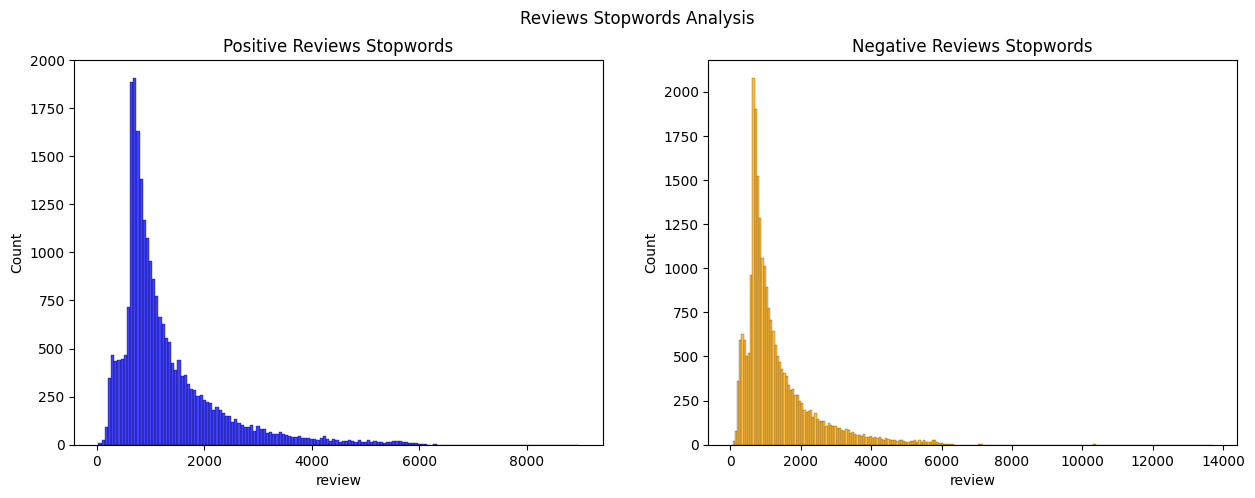

In [9]:
#Analyse Stopwords

def plot_count_1(count_ones,count_zeros,title_1,title_2,subtitle):
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
    sns.histplot(count_zeros,ax=ax1,color='Blue')
    ax1.set_title(title_1)
    sns.histplot(count_ones,ax=ax2,color='Orange')
    ax2.set_title(title_2)
    fig.suptitle(subtitle)
    plt.show()    


stops=set(stopwords.words('english'))
count_good_stops=count_good['review'].apply(lambda z : np.mean([len(z) for w in str(z).split()]))
count_bad_stops=count_bad['review'].apply(lambda z : np.mean([len(z) for w in str(z).split()]))
plot_count_1(count_good_stops,count_bad_stops,"Positive Reviews Stopwords","Negative Reviews Stopwords","Reviews Stopwords Analysis")

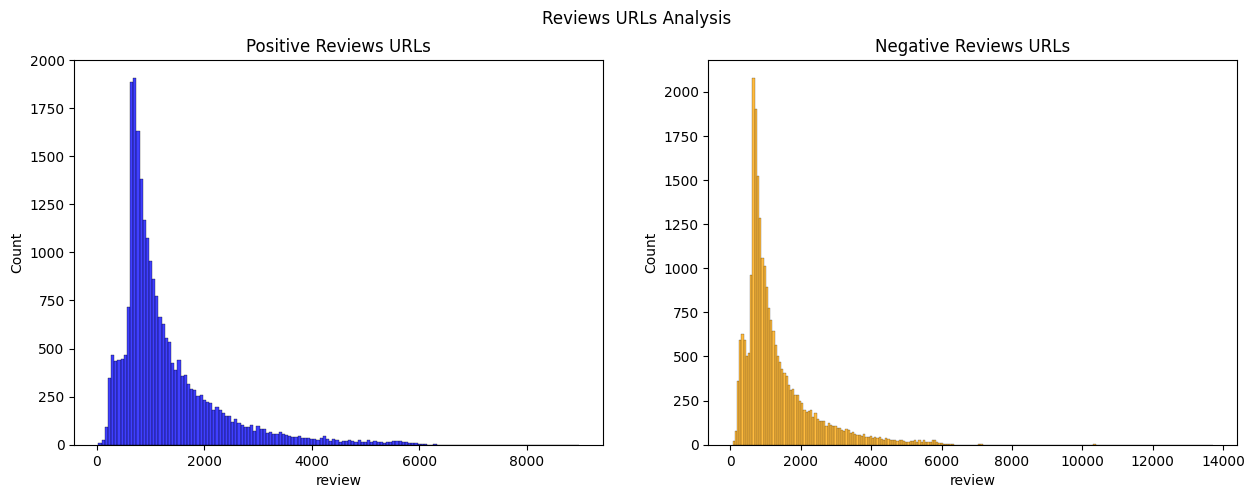

In [10]:
## Checking number of Urls
count_good_urls=count_good['review'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))
count_bad_urls=count_bad['review'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))

plot_count_1(count_good_stops,count_bad_stops,"Positive Reviews URLs","Negative Reviews URLs","Reviews URLs Analysis")

<Axes: >

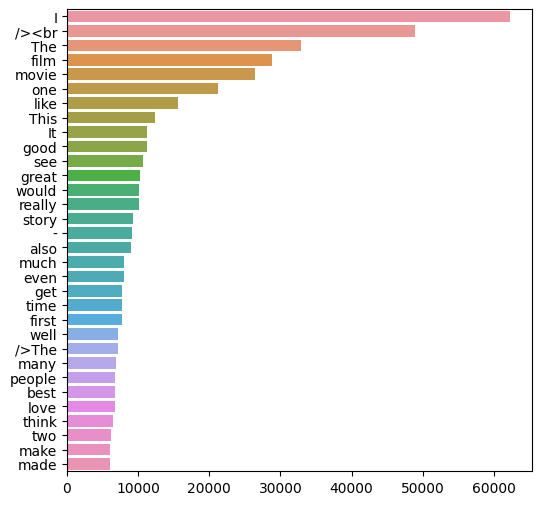

In [11]:
#Simplified counter function
def create_corpus(word):
    corpus=[]
    
    for x in train_df[train_df['sentiment']==word]['review'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

corpus=create_corpus('positive')
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:100]:
    if (word not in stops) :
        x.append(word)
        y.append(count)
sns.barplot(x=y,y=x)

### Inference From Analysis -1

The following can be inferred from the data:

- The dataset is balanced.
- The dataset contains equal number of semantics for reviews of both polarity.
- The dataset contains redundant words and html syntaxes.
- Punctuations/stopwords are present in a equal distribution in the dataset.

This tells us that we have to do lots of cleaning!

## Statistical analysis-2

This will enable us to gain a clearer understanding of which parts of the data should be removed and which parts can be modified prior to applying any models to it.

In [12]:
#Gram analysis on Training set- Bigram and Trigram
stopword=set(stopwords.words('english'))
def gram_analysis(data,gram):
    tokens=[t for t in data.lower().split(" ") if t!="" if t not in stopword]
    ngrams=zip(*[tokens[i:] for i in range(gram)])
    final_tokens=[" ".join(z) for z in ngrams]
    return final_tokens


#Create frequency grams for analysis
    
def create_dict(data,grams):
    freq_dict=defaultdict(int)
    for sentence in data:
        for tokens in gram_analysis(sentence,grams):
            freq_dict[tokens]+=1
    return freq_dict

def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["n_gram_words"].values[::-1],
        x=df["n_gram_frequency"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace



def create_new_df(freq_dict,):
    freq_df=pd.DataFrame(sorted(freq_dict.items(),key=lambda z:z[1])[::-1])
    freq_df.columns=['n_gram_words','n_gram_frequency']
    #print(freq_df.head())
    #plt.barh(freq_df['n_gram_words'][:20],freq_df['n_gram_frequency'][:20],linewidth=0.3)
    #plt.show()
    trace=horizontal_bar_chart(freq_df[:20],'orange')
    return trace
    
def plot_grams(trace_zero,trace_one):
    fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of positive reviews", 
                                          "Frequent words of negative reviews"])
    fig.append_trace(trace_zero, 1, 1)
    fig.append_trace(trace_ones, 1, 2)
    fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
    py.iplot(fig, filename='word-plots')
    
    
train_df_zero=count_bad['review']
train_df_ones=count_good['review']

print("Bi-gram analysis")
freq_train_df_zero=create_dict(train_df_zero[:200],2)
#print(freq_train_df_zero)
trace_zero=create_new_df(freq_train_df_zero)
freq_train_df_ones=create_dict(train_df_ones[:200],2)
#print(freq_train_df_zero)
trace_ones=create_new_df(freq_train_df_ones)
plot_grams(trace_zero,trace_ones)
print("Tri-gram analysis")
freq_train_df_zero=create_dict(train_df_zero[:200],3)
#print(freq_train_df_zero)
trace_zero=create_new_df(freq_train_df_zero)
freq_train_df_ones=create_dict(train_df_ones[:200],3)
#print(freq_train_df_zero)
trace_ones=create_new_df(freq_train_df_ones)
plot_grams(trace_zero,trace_ones)

Bi-gram analysis


c:\Users\Warmtebron\anaconda3\envs\chessEnv\lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



Tri-gram analysis


c:\Users\Warmtebron\anaconda3\envs\chessEnv\lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [13]:
#Lets fo a Penta-Gram analysis to get an idea how the vectorization will be performed
print("Penta-gram analysis")
freq_train_df_zero=create_dict(train_df_zero[:200],5)
#print(freq_train_df_zero)
trace_zero=create_new_df(freq_train_df_zero)
freq_train_df_ones=create_dict(train_df_ones[:200],5)
#print(freq_train_df_zero)
trace_ones=create_new_df(freq_train_df_ones)
plot_grams(trace_zero,trace_ones)

Penta-gram analysis


c:\Users\Warmtebron\anaconda3\envs\chessEnv\lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



### Inference from Analysis - 2

The second part of our analysis involves examining the positional features of words within a corpus, sentence, or paragraph. Through gram analysis, specifically pentagram analysis, we can identify the sentences that occur most frequently in the corpus. Typically, these commonly occurring phrases are the ones that are selected by frequency vectorization techniques.

This approach provides a general overview of the frequency with which certain word combinations appear. Additionally, we need to address the presence of HTML tags and punctuation marks in the review corpus, as they introduce unwanted noise. This issue will be tackled in the cleaning phase.

## Cleaning the data.

Before proceeding, we need to clean the dataset and eliminate any redundancies. This involves removing various elements such as HTML codes, URLs, emojis, stopwords, and punctuations. Additionally, we may need to expand abbreviations to ensure that the text is properly standardized.

By carrying out these cleaning tasks, we can ensure that the corpus is free from any extraneous or distracting elements. This will enable us to move forward with our analysis in a more accurate and efficient manner.

In [14]:
%%time
import re
#Removes Punctuations
def remove_punctuations(data):
    punct_tag=re.compile(r'[^\w\s]')
    data=punct_tag.sub(r'',data)
    return data

#Removes HTML syntaxes
def remove_html(data):
    html_tag=re.compile(r'<.*?>')
    data=html_tag.sub(r'',data)
    return data

#Removes URL data
def remove_url(data):
    url_clean= re.compile(r"https://\S+|www\.\S+")
    data=url_clean.sub(r'',data)
    return data

#Removes Emojis
def remove_emoji(data):
    emoji_clean= re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    data=emoji_clean.sub(r'',data)
    url_clean= re.compile(r"https://\S+|www\.\S+")
    data=url_clean.sub(r'',data)
    return data

train_df['review']=train_df['review'].apply(lambda z: remove_punctuations(z))

train_df['review']=train_df['review'].apply(lambda z: remove_html(z))
train_df['review']=train_df['review'].apply(lambda z: remove_url(z))
train_df['review']=train_df['review'].apply(lambda z: remove_emoji(z))

CPU times: total: 1.16 s
Wall time: 3.18 s


In [15]:
## In this case, we will be replacing some abbreviated pronouns with full forms (example:"you've"->you have")
def remove_abb(data):
    data = re.sub("he's", "he is", data)
    data = re.sub("there's", "there is", data)
    data = re.sub("We're", "We are", data)
    data = re.sub("That's", "That is", data)
    data = re.sub("won't", "will not", data)
    data = re.sub("they're", "they are", data)
    data = re.sub("Can't", "Cannot", data)
    data = re.sub("wasn't", "was not", data)
    data = re.sub("don\x89Ûªt", "do not", data)
    data= re.sub("aren't", "are not", data)
    data = re.sub("isn't", "is not", data)
    data = re.sub("What's", "What is", data)
    data = re.sub("haven't", "have not", data)
    data = re.sub("hasn't", "has not", data)
    data = re.sub("There's", "There is", data)
    data = re.sub("He's", "He is", data)
    data = re.sub("It's", "It is", data)
    data = re.sub("You're", "You are", data)
    data = re.sub("I'M", "I am", data)
    data = re.sub("shouldn't", "should not", data)
    data = re.sub("wouldn't", "would not", data)
    data = re.sub("i'm", "I am", data)
    data = re.sub("I\x89Ûªm", "I am", data)
    data = re.sub("I'm", "I am", data)
    data = re.sub("Isn't", "is not", data)
    data = re.sub("Here's", "Here is", data)
    data = re.sub("you've", "you have", data)
    data = re.sub("you\x89Ûªve", "you have", data)
    data = re.sub("we're", "we are", data)
    data = re.sub("what's", "what is", data)
    data = re.sub("couldn't", "could not", data)
    data = re.sub("we've", "we have", data)
    data = re.sub("it\x89Ûªs", "it is", data)
    data = re.sub("doesn\x89Ûªt", "does not", data)
    data = re.sub("It\x89Ûªs", "It is", data)
    data = re.sub("Here\x89Ûªs", "Here is", data)
    data = re.sub("who's", "who is", data)
    data = re.sub("I\x89Ûªve", "I have", data)
    data = re.sub("y'all", "you all", data)
    data = re.sub("can\x89Ûªt", "cannot", data)
    data = re.sub("would've", "would have", data)
    data = re.sub("it'll", "it will", data)
    data = re.sub("we'll", "we will", data)
    data = re.sub("wouldn\x89Ûªt", "would not", data)
    data = re.sub("We've", "We have", data)
    data = re.sub("he'll", "he will", data)
    data = re.sub("Y'all", "You all", data)
    data = re.sub("Weren't", "Were not", data)
    data = re.sub("Didn't", "Did not", data)
    data = re.sub("they'll", "they will", data)
    data = re.sub("they'd", "they would", data)
    data = re.sub("DON'T", "DO NOT", data)
    data = re.sub("That\x89Ûªs", "That is", data)
    data = re.sub("they've", "they have", data)
    data = re.sub("i'd", "I would", data)
    data = re.sub("should've", "should have", data)
    data = re.sub("You\x89Ûªre", "You are", data)
    data = re.sub("where's", "where is", data)
    data = re.sub("Don\x89Ûªt", "Do not", data)
    data = re.sub("we'd", "we would", data)
    data = re.sub("i'll", "I will", data)
    data = re.sub("weren't", "were not", data)
    data = re.sub("They're", "They are", data)
    data = re.sub("Can\x89Ûªt", "Cannot", data)
    data = re.sub("you\x89Ûªll", "you will", data)
    data = re.sub("I\x89Ûªd", "I would", data)
    data = re.sub("let's", "let us", data)
    data = re.sub("it's", "it is", data)
    data = re.sub("can't", "cannot", data)
    data = re.sub("don't", "do not", data)
    data = re.sub("you're", "you are", data)
    data = re.sub("i've", "I have", data)
    data = re.sub("that's", "that is", data)
    data = re.sub("i'll", "I will", data)
    data = re.sub("doesn't", "does not",data)
    data = re.sub("i'd", "I would", data)
    data = re.sub("didn't", "did not", data)
    data = re.sub("ain't", "am not", data)
    data = re.sub("you'll", "you will", data)
    data = re.sub("I've", "I have", data)
    data = re.sub("Don't", "do not", data)
    data = re.sub("I'll", "I will", data)
    data = re.sub("I'd", "I would", data)
    data = re.sub("Let's", "Let us", data)
    data = re.sub("you'd", "You would", data)
    data = re.sub("It's", "It is", data)
    data = re.sub("Ain't", "am not", data)
    data = re.sub("Haven't", "Have not", data)
    data = re.sub("Could've", "Could have", data)
    data = re.sub("youve", "you have", data)  
    data = re.sub("donå«t", "do not", data) 
    return data 
train_df['review']=train_df['review'].apply(lambda z: remove_abb(z))

In [16]:
train_df['review'][:5]

0    One of the other reviewers has mentioned that ...
1    A wonderful little production br br The filmin...
2    I thought this was a wonderful way to spend ti...
3    Basically theres a family where a little boy J...
4    Petter Matteis Love in the Time of Money is a ...
Name: review, dtype: object

In [17]:
train_df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production br br The filmin...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically theres a family where a little boy J...,negative
4,Petter Matteis Love in the Time of Money is a ...,positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,Bad plot bad dialogue bad acting idiotic direc...,negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,Im going to have to disagree with the previous...,negative
